In [ ]:
# Install necessary libraries if not present
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV files (change path if loading from Google Drive)
sentinel1_path = "/content/sentinel1_vegetation_indices-2.csv"  # Update path if needed
sentinel2_path = "/content/sentinel2_vegetation_indices-2.csv"  # Update path if needed

In [ ]:
# Read CSV files
sentinel1_df = pd.read_csv(sentinel1_path)
sentinel2_df = pd.read_csv(sentinel2_path)

In [ ]:
# Standardize column names
sentinel1_df.rename(columns={"date": "Date"}, inplace=True)
sentinel2_df.rename(columns={"date": "Date"}, inplace=True)

In [ ]:
# Convert 'Date' column to datetime format
sentinel1_df['Date'] = pd.to_datetime(sentinel1_df['Date'])
sentinel2_df['Date'] = pd.to_datetime(sentinel2_df['Date'])

DATA ANALYSIS

In [ ]:
# Sentinel-1 Analysis
print("Sentinel-1 Data Summary:\n", sentinel1_df.describe())
print("\nMissing values in Sentinel-1:\n", sentinel1_df.isnull().sum())

Sentinel-1 Data Summary:
                                 Date         VV         VH        RVI  \
count                             65  65.000000  65.000000  65.000000   
mean   2024-01-27 12:55:23.076923136 -10.518542 -18.426937   2.548800   
min              2023-01-03 00:00:00 -12.365924 -21.090008   2.505146   
25%              2023-07-14 00:00:00 -11.422897 -19.678542   2.520500   
50%              2024-01-22 00:00:00 -10.710887 -18.401685   2.533137   
75%              2024-08-13 00:00:00  -9.637705 -17.195619   2.560987   
max              2025-02-21 00:00:00  -7.682459 -14.566733   2.661788   
std                              NaN   1.159079   1.527757   0.041488   

       Soil_Moisture  Surface_Reflectance  
count      65.000000            65.000000  
mean        0.637200             7.908396  
min         0.626286             6.676850  
25%         0.630125             7.380814  
50%         0.633284             7.897648  
75%         0.640247             8.351710  
max     

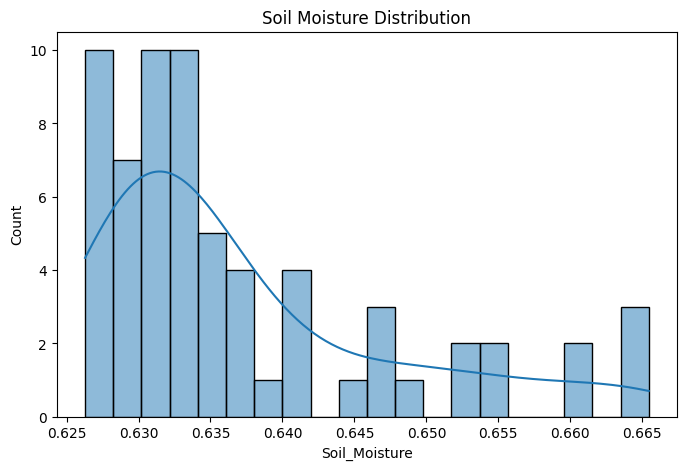

In [ ]:
# Plot soil moisture distribution
plt.figure(figsize=(8,5))
sns.histplot(sentinel1_df['Soil_Moisture'], bins=20, kde=True)
plt.title("Soil Moisture Distribution")
plt.show()

In [ ]:
# Sentinel-2 Analysis
print("Sentinel-2 Data Summary:\n", sentinel2_df.describe())
print("\nMissing values in Sentinel-2:\n", sentinel2_df.isnull().sum())

Sentinel-2 Data Summary:
                       Date           B2           B3           B4  \
count                   50    50.000000    50.000000    50.000000   
mean   2023-12-20 04:48:00  2348.240000  2615.800000  2932.580000   
min    2023-01-03 00:00:00  1320.000000  1596.000000  1393.000000   
25%    2023-04-09 06:00:00  1762.250000  2058.500000  2330.000000   
50%    2024-01-30 12:00:00  1982.500000  2267.000000  2570.000000   
75%    2024-04-22 00:00:00  2278.500000  2648.000000  3357.000000   
max    2025-02-26 00:00:00  7488.000000  6900.000000  6584.000000   
std                    NaN  1280.046086  1083.323364  1052.923182   

                B5           B6           B7           B8          B8A  B10  \
count    50.000000    50.000000    50.000000    50.000000    50.000000  0.0   
mean   3396.520000  3907.860000  4170.380000  4179.120000  4427.200000  NaN   
min    1914.000000  2970.000000  3250.000000  3222.000000  3503.000000  NaN   
25%    2760.000000  3495.750000  374

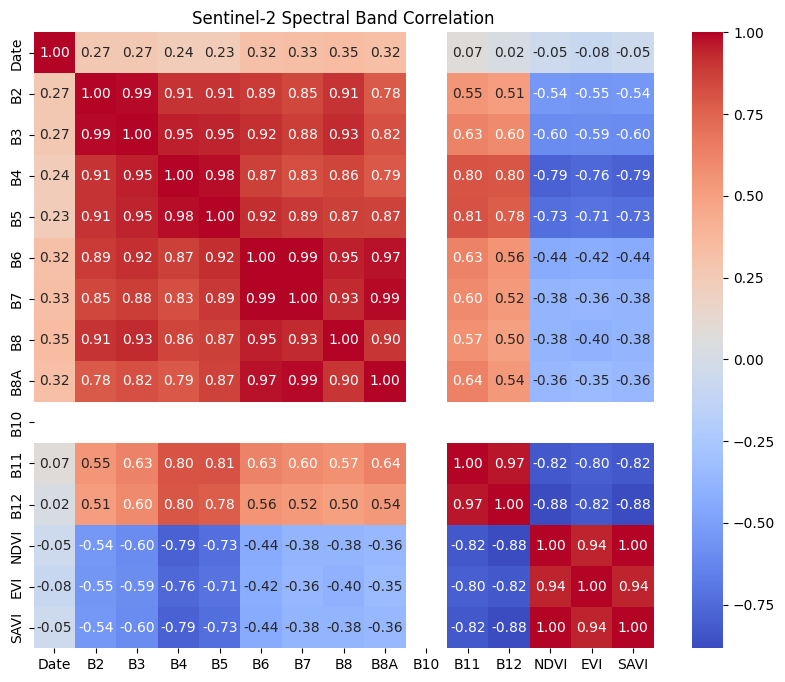

In [ ]:
# Correlation heatmap for Sentinel-2 bands
plt.figure(figsize=(10,8))
sns.heatmap(sentinel2_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sentinel-2 Spectral Band Correlation")
plt.show()

DATA FUSION

In [ ]:
# Merge the two datasets based on 'Date' (Inner join to keep common timestamps)
merged_df = pd.merge(sentinel1_df, sentinel2_df, on="Date", how="outer")

In [ ]:
# Drop column 'B10' as it contains only NaN values
if "B10" in merged_df.columns:
    merged_df.drop(columns=["B10"], inplace=True)

In [ ]:
# Check missing values after merging
print("\nMissing values in Merged Dataset:\n", merged_df.isnull().sum())


Missing values in Merged Dataset:
 Date                    0
VV                     44
VH                     44
RVI                    44
Soil_Moisture          44
Surface_Reflectance    44
B2                     59
B3                     59
B4                     59
B5                     59
B6                     59
B7                     59
B8                     59
B8A                    59
B11                    59
B12                    59
NDVI                   59
EVI                    59
SAVI                   59
dtype: int64


In [ ]:
# ✅ KNN Imputation (Choose k=5 nearest neighbors)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
merged_df.iloc[:, 1:] = knn_imputer.fit_transform(merged_df.iloc[:, 1:])  # Skip 'Date' column

# ✅ Save Cleaned Data
merged_df.to_csv("sentinel_merged.csv", index=False)

# ✅ Print number of missing values after filling
print("Missing values after filling:\n", merged_df.isnull().sum())


Missing values after filling:
 Date                   0
VV                     0
VH                     0
RVI                    0
Soil_Moisture          0
Surface_Reflectance    0
B2                     0
B3                     0
B4                     0
B5                     0
B6                     0
B7                     0
B8                     0
B8A                    0
B11                    0
B12                    0
NDVI                   0
EVI                    0
SAVI                   0
dtype: int64


In [ ]:
# Summary statistics of merged data
print("Merged Data Summary:\n", merged_df.describe())

Merged Data Summary:
                                 Date          VV          VH         RVI  \
count                            109  109.000000  109.000000  109.000000   
mean   2024-01-10 11:26:58.348623872  -10.553008  -18.401319    2.543799   
min              2023-01-03 00:00:00  -12.365924  -21.090008    2.505146   
25%              2023-05-23 00:00:00  -11.055386  -19.036720    2.529036   
50%              2024-01-28 00:00:00  -10.603924  -18.363474    2.536411   
75%              2024-07-20 00:00:00  -10.490552  -18.273830    2.538011   
max              2025-02-26 00:00:00   -7.682459  -14.566733    2.661788   
std                              NaN    0.893251    1.176484    0.032516   

       Soil_Moisture  Surface_Reflectance           B2           B3  \
count     109.000000           109.000000   109.000000   109.000000   
mean        0.635950             7.848311  2602.243119  2840.541284   
min         0.626286             6.676850  1320.000000  1596.000000   
25%      

In [ ]:
# Normalize all numerical columns except 'Date'
for col in merged_df.columns[1:]:  # Skipping 'Date' column
    merged_df[col] = (merged_df[col] - merged_df[col].min()) / (merged_df[col].max() - merged_df[col].min())

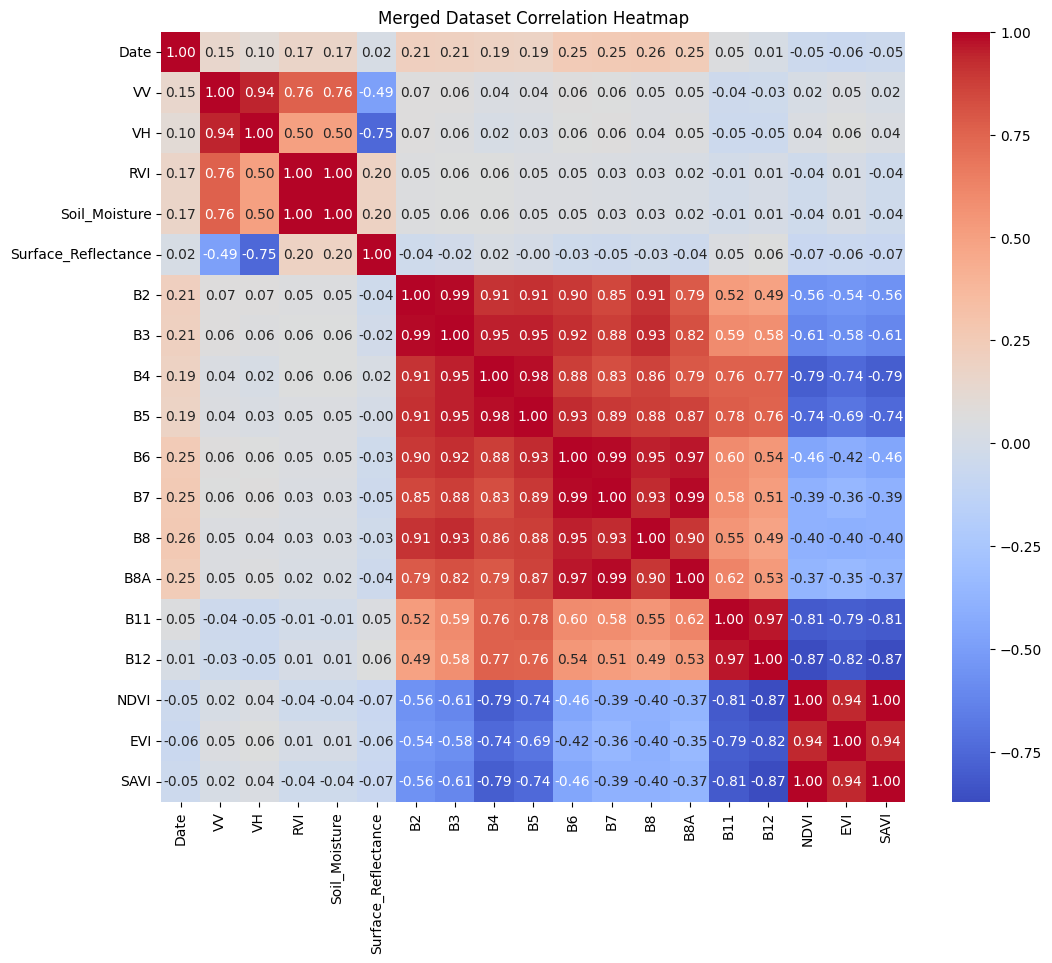

In [ ]:
# Visualization of correlations in merged dataset
plt.figure(figsize=(12,10))
sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Merged Dataset Correlation Heatmap")
plt.show()

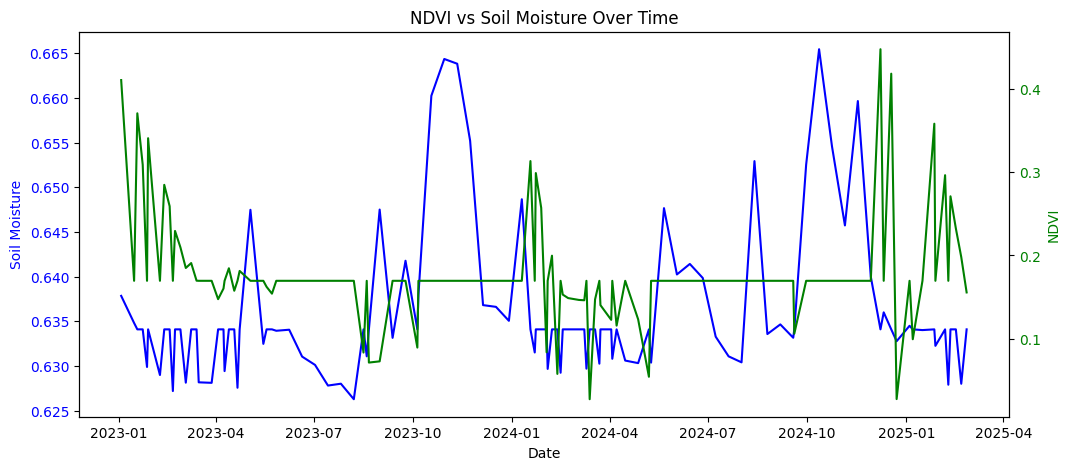

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/sentinel_merged.csv"
df = pd.read_csv(file_path)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by="Date")

# Plot NDVI and Soil Moisture
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Soil Moisture
ax1.plot(df['Date'], df['Soil_Moisture'], 'b-', label='Soil Moisture')
ax1.set_xlabel('Date')
ax1.set_ylabel('Soil Moisture', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot NDVI on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['NDVI'], 'g-', label='NDVI')
ax2.set_ylabel('NDVI', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("NDVI vs Soil Moisture Over Time")
plt.show()

In [ ]:
df.columns

Index(['Date', 'VV', 'VH', 'RVI', 'Soil_Moisture', 'Surface_Reflectance', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI', 'EVI',
       'SAVI'],
      dtype='object')

MODEL TRAINING

In [ ]:
# Install Required Libraries
!pip install torch norse pandas scikit-learn numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the fused dataset
file_path = "/content/sentinel_merged.csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop Non-Numeric Columns (e.g., Date)
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
df = df.drop(columns=non_numeric_cols)

In [ ]:
# Drop Rows with Missing Values
df = df.dropna()

In [ ]:
# Define Target Variables
target_columns = ["Soil_Moisture", "NDVI", "EVI", "SAVI"]
existing_targets = [col for col in target_columns if col in df.columns]

In [ ]:
# Ensure Data is Numeric
df = df.astype(np.float32)

In [ ]:
# Separate Features (X) and Targets (y)
X = df.drop(columns=existing_targets).values
y = df[existing_targets].values

In [ ]:
# Normalize Features and Targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [ ]:
# Convert Data to PyTorch Tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [ ]:
# Encoding Data into Spike Trains (Rate Coding)
def rate_encoding(data, time_steps=50):
    encoded_spikes = (torch.rand((data.shape[0], time_steps, data.shape[1])) < data.unsqueeze(1)).float()
    return encoded_spikes

X_train_spikes = rate_encoding(X_train)
X_test_spikes = rate_encoding(X_test)

In [ ]:
# Define Spiking Neural Network (SNN) Model
class SNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        batch_size, time_steps, _ = x.shape
        mem1 = norse.LIFState(v=torch.zeros(batch_size, 10).to(x.device),
                              i=torch.zeros(batch_size, 10).to(x.device),
                              z=torch.zeros(batch_size, 10).to(x.device))
        for t in range(time_steps):
            x_t = self.fc1(x[:, t, :])
            spiked, mem1 = self.lif1(x_t, mem1)
            x_t = self.fc2(spiked)
        return x_t

In [ ]:
# Initialize Model
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = y_train.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SNNModel(input_dim, hidden_dim, output_dim).to(device)


In [ ]:
# Define Optimizer & Loss Function
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [ ]:
# Train the Spiking Neural Network
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_spikes.to(device))
    loss = loss_fn(predictions, y_train.to(device))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation Loss Calculation
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_test_spikes.to(device))
        val_loss = loss_fn(val_predictions, y_test.to(device))
        val_losses.append(val_loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch}/{epochs}, Training Loss = {loss.item():.4f}, Validation Loss = {val_loss.item():.4f}")

Epoch 0/100, Training Loss = 1.0314, Validation Loss = 1.1897
Epoch 5/100, Training Loss = 0.9513, Validation Loss = 1.1796
Epoch 10/100, Training Loss = 0.8941, Validation Loss = 1.2046
Epoch 15/100, Training Loss = 0.8510, Validation Loss = 1.2670
Epoch 20/100, Training Loss = 0.8242, Validation Loss = 1.1695
Epoch 25/100, Training Loss = 0.7708, Validation Loss = 1.1782
Epoch 30/100, Training Loss = 0.7292, Validation Loss = 1.1301
Epoch 35/100, Training Loss = 0.7564, Validation Loss = 1.1223
Epoch 40/100, Training Loss = 0.7440, Validation Loss = 1.1570
Epoch 45/100, Training Loss = 0.6656, Validation Loss = 1.0790
Epoch 50/100, Training Loss = 0.6729, Validation Loss = 1.1534
Epoch 55/100, Training Loss = 0.6998, Validation Loss = 1.1753
Epoch 60/100, Training Loss = 0.6611, Validation Loss = 1.1327
Epoch 65/100, Training Loss = 0.5957, Validation Loss = 0.9890
Epoch 70/100, Training Loss = 0.6509, Validation Loss = 1.0647
Epoch 75/100, Training Loss = 0.6053, Validation Loss = 1

In [ ]:
# Save the trained model
model_path = "snn_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to snn_model.pth


In [ ]:
# Evaluate the Model on Test Data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_spikes.to(device))
    test_loss = loss_fn(test_predictions, y_test.to(device))
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 1.0477


In [ ]:
# Convert Predictions Back to Original Scale
test_predictions = scaler_y.inverse_transform(test_predictions.cpu().numpy())
df_predictions = pd.DataFrame(test_predictions, columns=existing_targets)

In [ ]:
# Calculate Additional Parameters
# Land Surface Temperature (LST) using B10 Band (if available)
if "B11" in df.columns and "B12" in df.columns:
    df_predictions["LST"] = 1.17 * df["B11"].mean() + 0.37 * df["B12"].mean() - 273.15


In [ ]:
# Crop Yield Forecasting (Simplified NDVI-Based Model)
df_predictions["Crop_Yield"] = df_predictions["NDVI"] * 10  # Placeholder formula


In [ ]:
# Drought Stress Analysis (NDVI & Soil Moisture based)
df_predictions["Drought_Stress"] = (1 - df_predictions["NDVI"]) * (1 - df_predictions["Soil_Moisture"])


In [ ]:
# Water Availability for Irrigation (Soil Moisture-based)
df_predictions["Water_Availability"] = df_predictions["Soil_Moisture"] * 100  # Placeholder formula

In [ ]:
# Flowering Time Estimation
# Assuming flowering time is influenced by NDVI and LST (higher values indicate early flowering)
if "LST" in df_predictions.columns:
    df_predictions["Flowering_Time"] = 100 - (df_predictions["NDVI"] * 50 + df_predictions["LST"] * 0.5)  # Placeholder formula

In [ ]:
# # Determine Crop Condition Based on Factors
# def evaluate_crop_condition(row):
#     if row["Soil_Moisture"] < 0.2 or row["NDVI"] < 0.3 or row["Water_Availability"] < 30 or row["Drought_Stress"] > 0.7 or row["LST"] > 35:
#         return "Bad for Crops"
#     elif 0.2 <= row["Soil_Moisture"] < 0.4 and 0.3 <= row["NDVI"] < 0.6:
#         return "Moderate Conditions"
#     else:
#         return "Good for Crops"

# df_predictions["Crop_Condition"] = df_predictions.apply(evaluate_crop_condition, axis=1)

In [ ]:
# Print Results
print("\nFinal Predictions Including Crop Condition Assessment:")
print(df_predictions.head())


Final Predictions Including Crop Condition Assessment:
   Soil_Moisture      NDVI       EVI      SAVI          LST  Crop_Yield  \
0       0.634594  0.203096  0.866209  0.310540  6587.679688    2.030963   
1       0.634594  0.203096  0.866209  0.310540  6587.679688    2.030963   
2       0.638617  0.180283  0.732169  0.273079  6587.679688    1.802835   
3       0.634594  0.203096  0.866209  0.310540  6587.679688    2.030963   
4       0.634594  0.203096  0.866209  0.310540  6587.679688    2.030963   

   Drought_Stress  Water_Availability  Flowering_Time  
0        0.291194           63.459373    -3203.994629  
1        0.291194           63.459373    -3203.994629  
2        0.296232           63.861664    -3202.854004  
3        0.291194           63.459373    -3203.994629  
4        0.291194           63.459373    -3203.994629  


EVALUATION METRICS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os

In [ ]:
# Calculate Model Evaluation Metrics
y_test_actual = scaler_y.inverse_transform(y_test.cpu().numpy())

mse = mean_squared_error(y_test_actual, test_predictions)
mae = mean_absolute_error(y_test_actual, test_predictions)
r2 = r2_score(y_test_actual, test_predictions)
rmse = np.sqrt(mse)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0977
Mean Absolute Error (MAE): 0.1064
Root Mean Squared Error (RMSE): 0.3126
R² Score: 0.1143


In [ ]:
# Calculate accuracy within the defined tolerance range
tolerance = 0.20
absolute_errors = np.abs(y_test_actual - test_predictions)
within_tolerance = absolute_errors <= (tolerance * y_test_actual)
accuracy = np.mean(within_tolerance) * 100  # Convert to percentage
print(f"Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")

Accuracy (within 20.0% tolerance): 64.77%


In [ ]:
# Compute Pearson Correlation for Each Output Variable
for i, target in enumerate(existing_targets):
    correlation = np.corrcoef(y_test_actual[:, i], test_predictions[:, i])[0, 1]
    print(f"Pearson Correlation ({target}): {correlation:.4f}")

Pearson Correlation (Soil_Moisture): 0.7657
Pearson Correlation (NDVI): 0.1175
Pearson Correlation (EVI): 0.1244
Pearson Correlation (SAVI): 0.1154


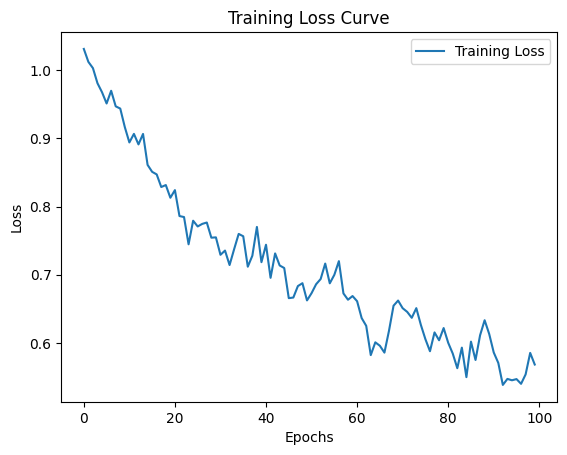

In [ ]:
# Plot Training Loss
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

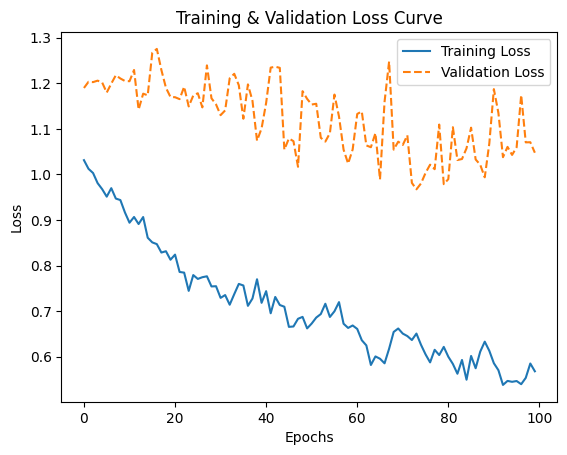

In [ ]:
# Plot Training & Validation Loss Curves
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss", linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Soil Moisture')

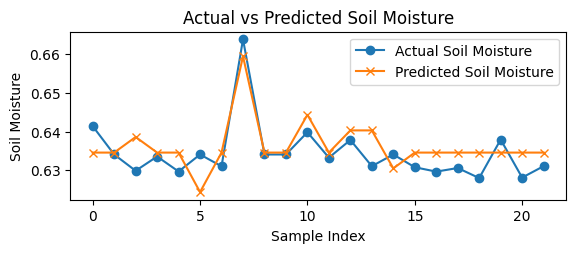

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(y_test_actual[:, 0], label="Actual Soil Moisture", marker="o")
plt.plot(test_predictions[:, 0], label="Predicted Soil Moisture", marker="x")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")

Text(0.5, 1.0, 'Actual vs Predicted NDVI')

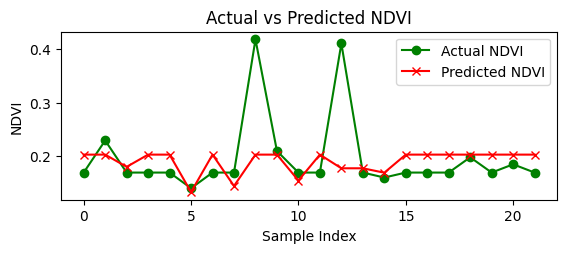

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(y_test_actual[:, 1], label="Actual NDVI", marker="o", color="green")
plt.plot(test_predictions[:, 1], label="Predicted NDVI", marker="x", color="red")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("NDVI")
plt.title("Actual vs Predicted NDVI")